In [20]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
data = pd.read_csv("/content/ds_salaries.csv")
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [22]:
data.shape

(607, 12)

In [23]:
data.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [24]:
print(data['salary'].value_counts())

salary
100000    18
80000     18
60000     15
120000    15
150000    14
          ..
78000      1
177000     1
405000     1
380000     1
152500     1
Name: count, Length: 272, dtype: int64


In [25]:
print(data['experience_level'].value_counts())

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64


In [26]:
print(data['job_title'].value_counts())

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineering Manager      

In [27]:
print(data['salary_in_usd'].value_counts())

salary_in_usd
100000    15
120000    12
150000    12
200000    10
135000     9
          ..
144854     1
192564     1
110925     1
25000      1
150075     1
Name: count, Length: 369, dtype: int64


In [28]:
print(data['employment_type'].value_counts())

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


In [29]:
print(data['company_size'].value_counts())

company_size
M    326
L    198
S     83
Name: count, dtype: int64


In [30]:
data.drop(['salary_currency'],axis=1,inplace=True)

In [31]:
#feature and target
x= data.drop(['salary_in_usd'],axis=1)
y= data['salary_in_usd']

In [32]:
x

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [33]:
y

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000


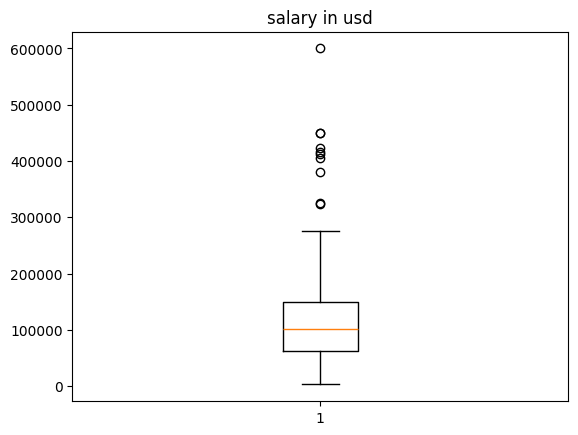

In [34]:
#outliers(not necessary)
import matplotlib.pyplot as plt
plt.boxplot(data['salary_in_usd'])
plt.title('salary in usd')
plt.show()

In [35]:
# Identify categorical and numerical columns
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [36]:
# Preprocessing pipelines
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [37]:
# Define multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
# Train and evaluate models
results = {}
for name, regressor in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    print(f"\n{name}:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")


Linear Regression:
MAE: 45506.56, RMSE: 3760962682.98, R2: 0.02

Random Forest:
MAE: 6384.13, RMSE: 403637742.00, R2: 0.89

Gradient Boosting:
MAE: 6108.38, RMSE: 142727699.87, R2: 0.96

XGBoost:
MAE: 5578.96, RMSE: 307045728.00, R2: 0.92


In [41]:
# Optional: Hyperparameter tuning for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(grid_search.best_params_)



Best Parameters for Random Forest:
{'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


In [42]:
# Final Evaluation on Best RF Model
# Predict on the test data using the best-tuned RF model
y_pred_best = grid_search.predict(X_test)

# Evaluate the tuned model
mae = mean_absolute_error(y_test, y_pred_best)
rmse = mean_squared_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

# Output the results
print("\nTuned Random Forest Results:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")


Tuned Random Forest Results:
MAE: 6222.93, RMSE: 380036171.86, R2: 0.90


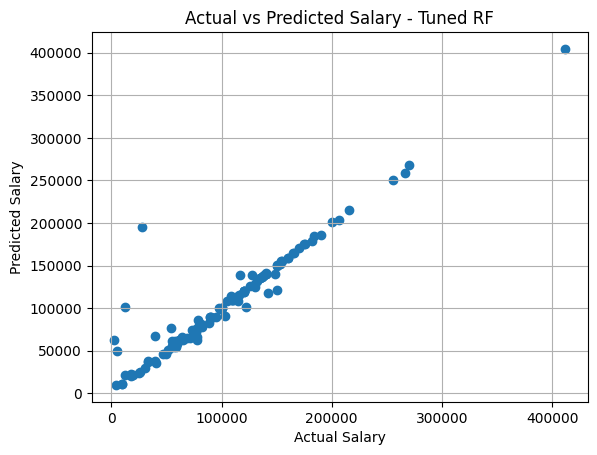

In [43]:
#Plot actual vs predicted for best model
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary - Tuned RF")
plt.grid(True)
plt.show()

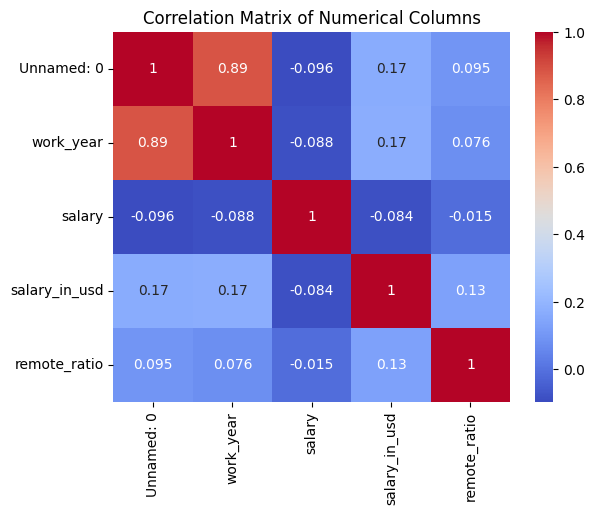

In [44]:
# Select only numerical columns for correlation heatmap
numerical_data = data.select_dtypes(include=np.number)

# Calculate and plot the correlation matrix
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

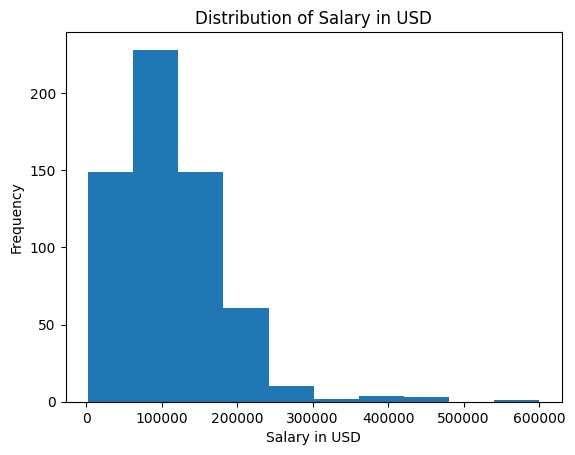

In [45]:
plt.hist(y)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

In [46]:
import joblib
joblib.dump(grid_search, 'salary_predictor.pkl')

['salary_predictor.pkl']

In [47]:
import joblib

# Load the saved model
loaded_model = joblib.load('salary_predictor.pkl')

print("Model loaded successfully!")

Model loaded successfully!


In [48]:
# Load and test the saved model
loaded_model = joblib.load('salary_predictor.pkl')
print("Model loaded successfully!")

sample_input = X_test.iloc[0:1]  # Test with one sample
predicted_salary = loaded_model.predict(sample_input)
print("Predicted Salary for sample input:", predicted_salary[0])


Model loaded successfully!
Predicted Salary for sample input: 140514.58


In [49]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00


In [51]:
 # Streamlit Interface
import streamlit as st

st.title("💼 Employee Salary Prediction")

with st.form("prediction_form"):
    experience_level = st.selectbox("Experience Level", data['experience_level'].unique())
    employment_type = st.selectbox("Employment Type", data['employment_type'].unique())
    job_title = st.selectbox("Job Title", data['job_title'].unique())
    employee_residence = st.selectbox("Employee Residence", data['employee_residence'].unique())
    remote_ratio = st.slider("Remote Ratio", 0, 100, 50)
    company_location = st.selectbox("Company Location", data['company_location'].unique())
    company_size = st.selectbox("Company Size", data['company_size'].unique())
    work_year = st.selectbox("Work Year", sorted(data['work_year'].unique()))

    submit = st.form_submit_button("Predict Salary")

if submit:
    input_df = pd.DataFrame.from_dict([{
        'work_year': work_year,
        'experience_level': experience_level,
        'employment_type': employment_type,
        'job_title': job_title,
        'employee_residence': employee_residence,
        'remote_ratio': remote_ratio,
        'company_location': company_location,
        'company_size': company_size
    }])
    prediction = loaded_model.predict(input_df)
    st.success(f"Predicted Salary (USD): ${prediction[0]:,.2f}")

2025-07-19 06:45:01.882 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.889 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.892 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-19 06:45:01.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar